# Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

plt.style.use('fivethirtyeight')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Loading The Data

In [2]:
df = pd.read_csv('/kaggle/input/thyroid-disease-data/Thyroid_Diff.csv')

# EDA

In [3]:
#first 5 rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [4]:
#shape of the data
df.shape

(383, 17)

In [5]:
#statistical information about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,383.0,40.866841,15.134494,15.0,29.0,37.0,51.0,82.0


In [6]:
#number of nulls in each column
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

In [7]:
#information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
#unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Age':
[27 34 30 62 52 41 46 51 40 75 59 49 50 76 42 44 43 36 70 60 33 26 37 55
 31 45 20 38 29 25 21 23 24 35 54 22 69 28 17 73 18 39 57 66 32 47 56 63
 19 67 72 61 68 48 81 53 58 80 79 65 15 82 71 64 78]

Unique values in column 'Gender':
['F' 'M']

Unique values in column 'Smoking':
['No' 'Yes']

Unique values in column 'Hx Smoking':
['No' 'Yes']

Unique values in column 'Hx Radiothreapy':
['No' 'Yes']

Unique values in column 'Thyroid Function':
['Euthyroid' 'Clinical Hyperthyroidism' 'Clinical Hypothyroidism'
 'Subclinical Hyperthyroidism' 'Subclinical Hypothyroidism']

Unique values in column 'Physical Examination':
['Single nodular goiter-left' 'Multinodular goiter'
 'Single nodular goiter-right' 'Normal' 'Diffuse goiter']

Unique values in column 'Adenopathy':
['No' 'Right' 'Extensive' 'Left' 'Bilateral' 'Posterior']

Unique values in column 'Pathology':
['Micropapillary' 'Papillary' 'Follicular' 'Hurthel cell']

Unique values in column 'Focality':
['Uni

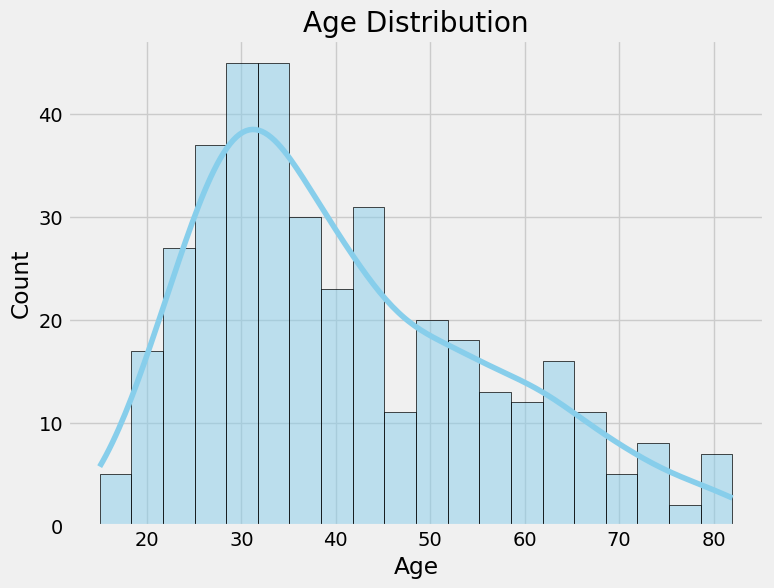

In [9]:
#Age distribution
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

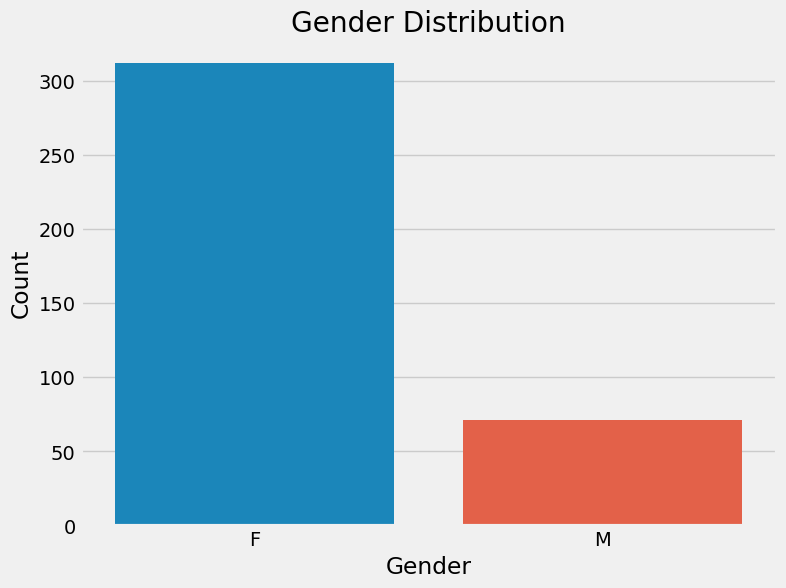

In [10]:
#Gender distribution
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Gender', data = df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

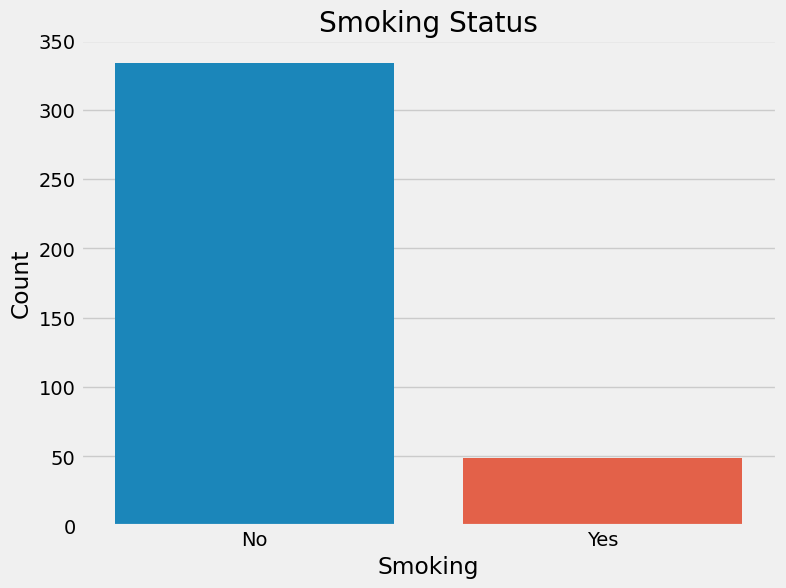

In [11]:
#Smoking status
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Smoking', data = df)
plt.title('Smoking Status')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.show()

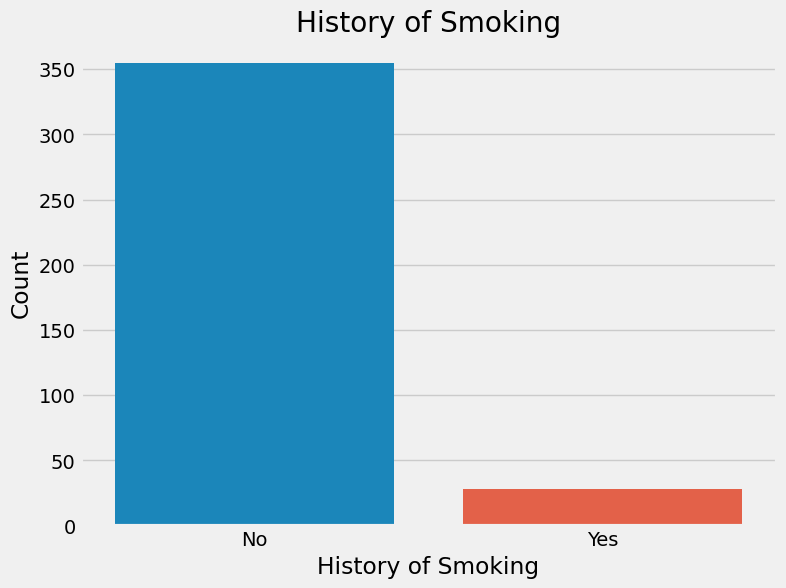

In [12]:
#History of Smoking
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Hx Smoking', data = df)
plt.title('History of Smoking')
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.show()

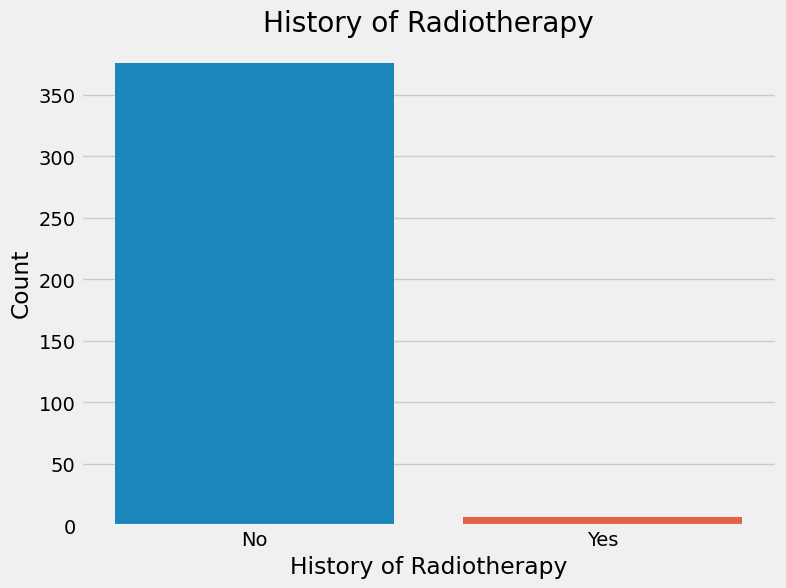

In [13]:
#History of Radiotherapy
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Hx Radiothreapy', data = df)
plt.title('History of Radiotherapy')
plt.xlabel('History of Radiotherapy')
plt.ylabel('Count')
plt.show()

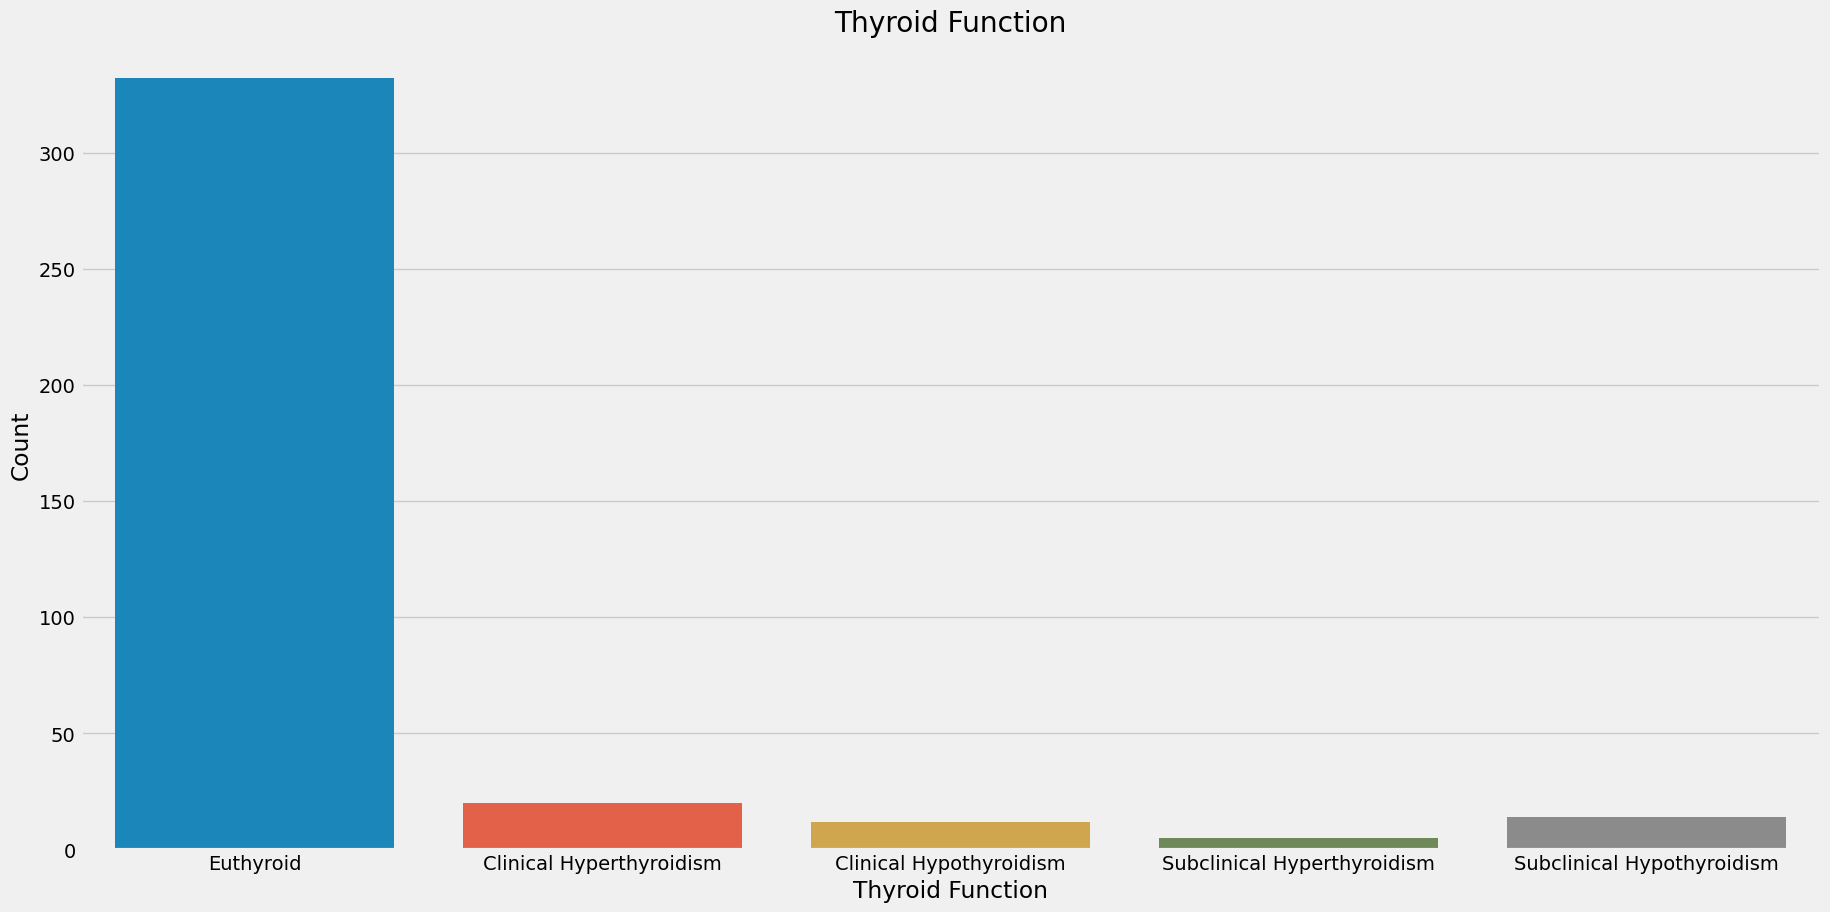

In [14]:
#Thyroid Function
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Thyroid Function', data = df)
plt.title('Thyroid Function')
plt.xlabel('Thyroid Function')
plt.ylabel('Count')
plt.show()

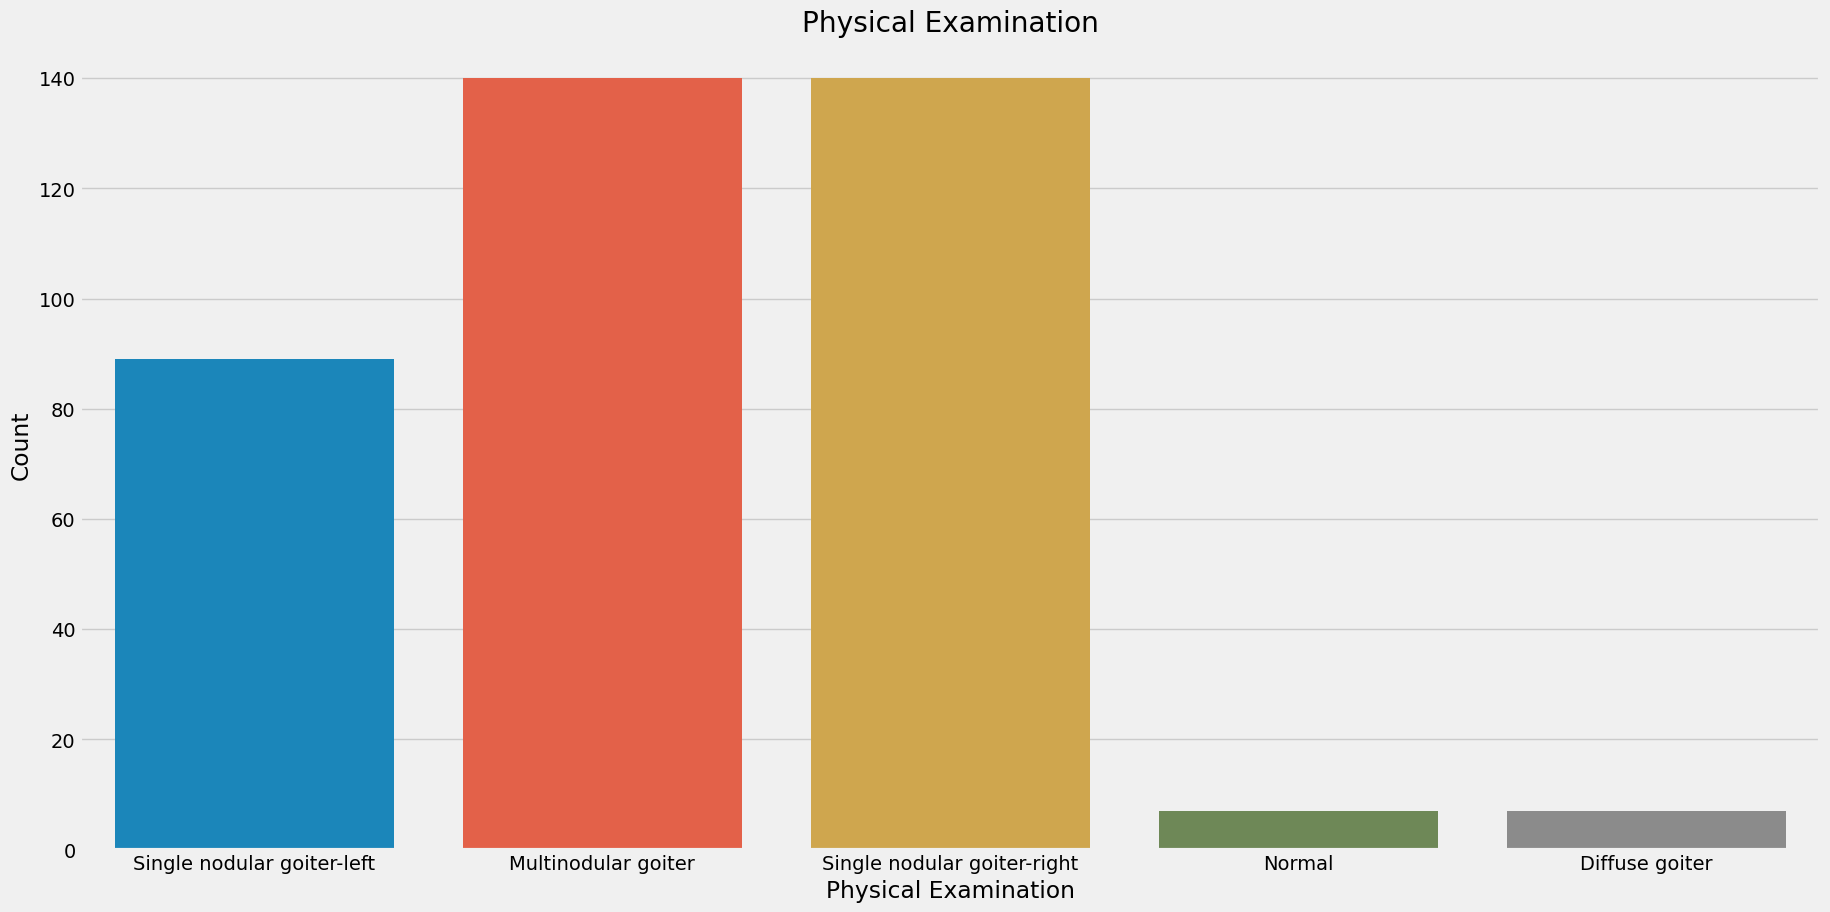

In [15]:
#Physical Examination
plt.figure(figsize = (20, 10))
sns.countplot(x = 'Physical Examination', data = df)
plt.title('Physical Examination')
plt.xlabel('Physical Examination')
plt.ylabel('Count')
plt.show()

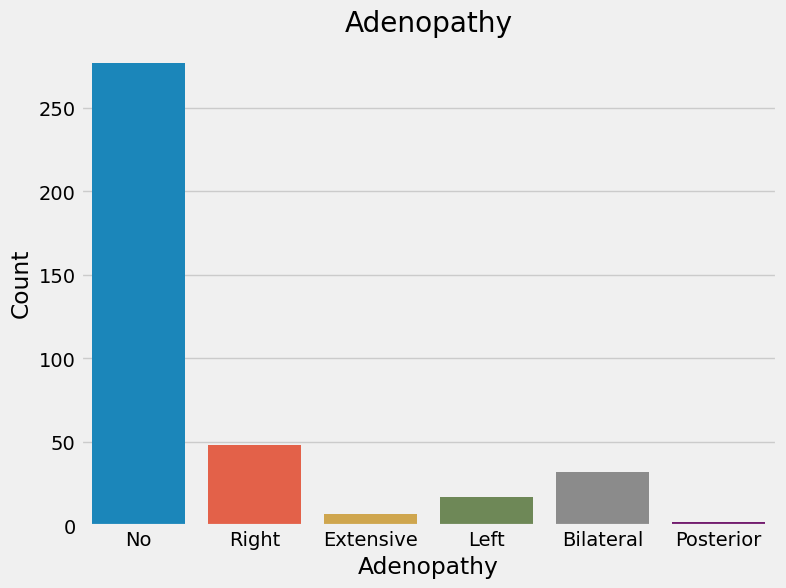

In [16]:
#Adenopathy
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Adenopathy', data = df)
plt.title('Adenopathy')
plt.xlabel('Adenopathy')
plt.ylabel('Count')
plt.show()

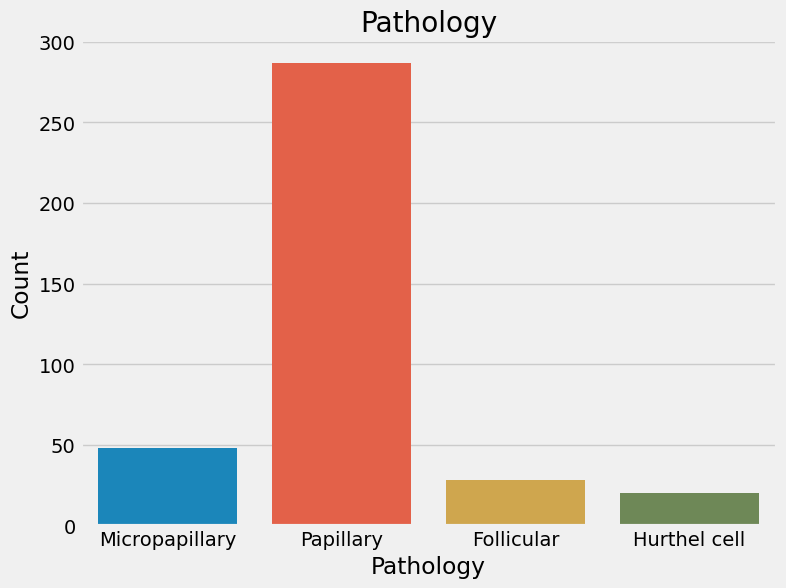

In [17]:
#Pathology
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Pathology', data = df)
plt.title('Pathology')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show()

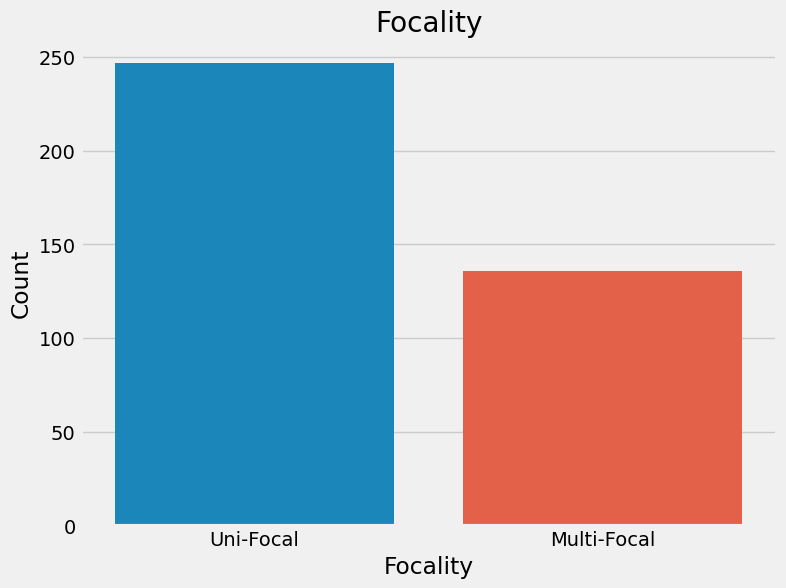

In [18]:
#Focality
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Focality', data = df)
plt.title('Focality')
plt.xlabel('Focality')
plt.ylabel('Count')
plt.show()

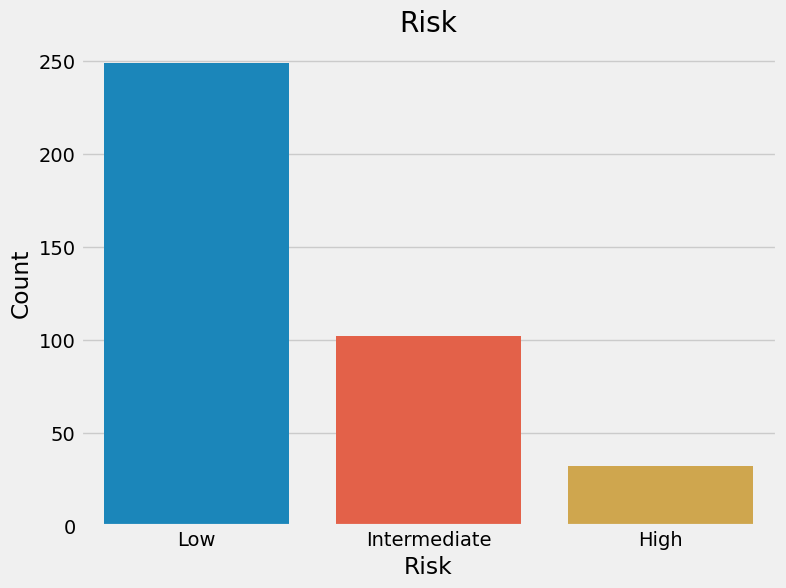

In [19]:
#Risk
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Risk', data = df)
plt.title('Risk')
plt.xlabel('Risk')
plt.ylabel('Count')
plt.show()

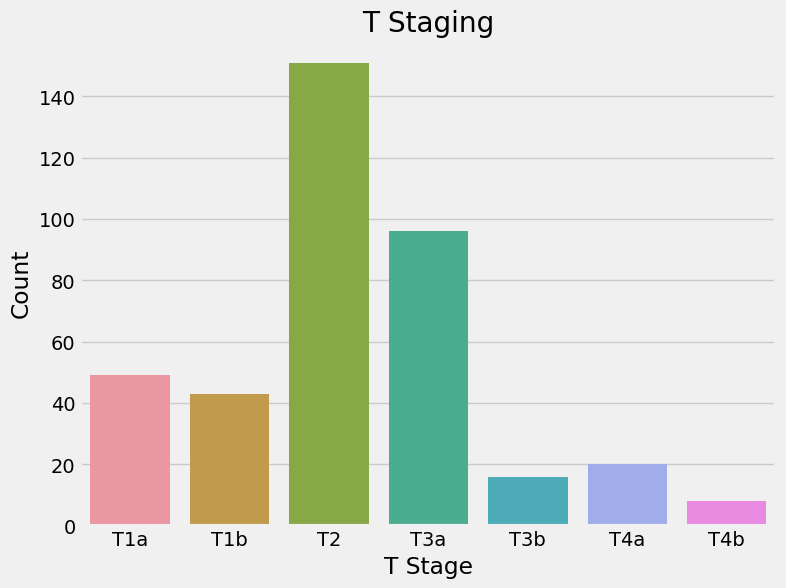

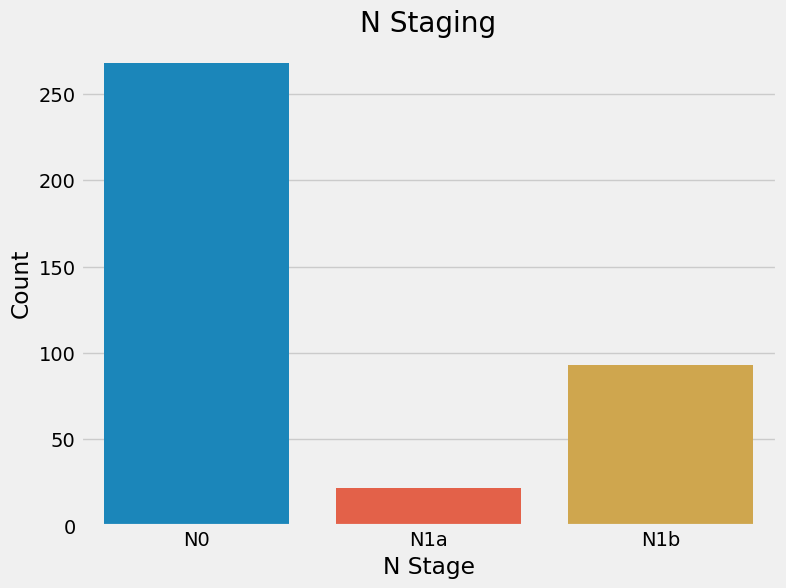

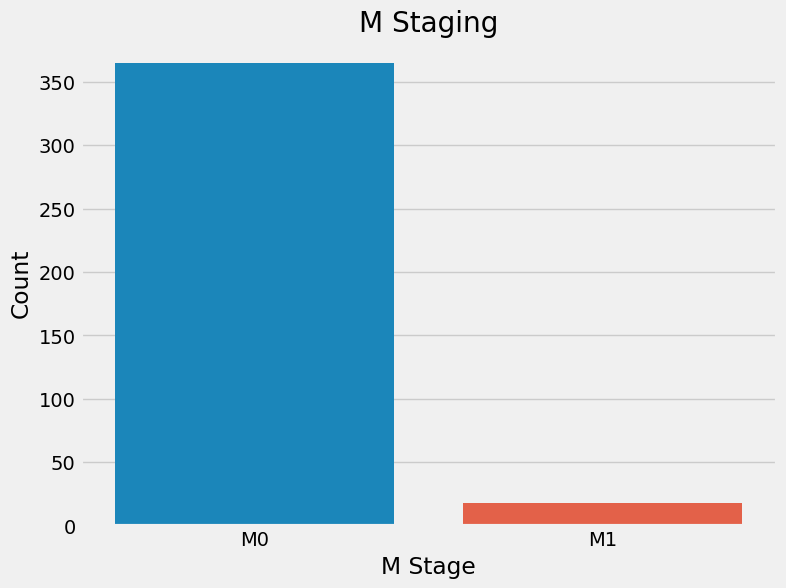

In [20]:
#T, N, M (TNM Staging)
plt.figure(figsize = (8, 6))
sns.countplot(x = 'T', data = df, order = sorted(df['T'].unique()))
plt.title('T Staging')
plt.xlabel('T Stage')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(x = 'N', data = df, order = sorted(df['N'].unique()))
plt.title('N Staging')
plt.xlabel('N Stage')
plt.ylabel('Count')
plt.show()

plt.figure(figsize = (8, 6))
sns.countplot(x = 'M', data = df, order = sorted(df['M'].unique()))
plt.title('M Staging')
plt.xlabel('M Stage')
plt.ylabel('Count')
plt.show()

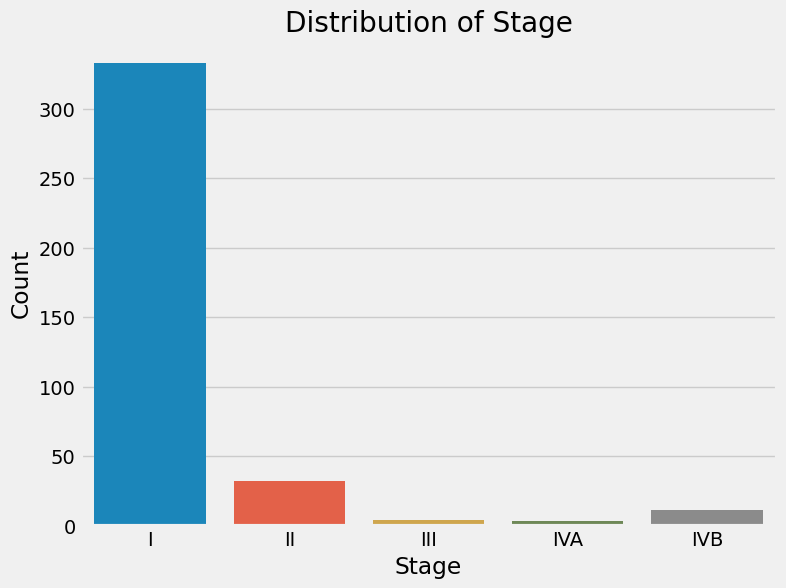

In [21]:
#Stage
stage_order = ['I', 'II', 'III', 'IVA', 'IVB']

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Stage', data = df, order = stage_order)  # Order the stages
plt.title('Distribution of Stage')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

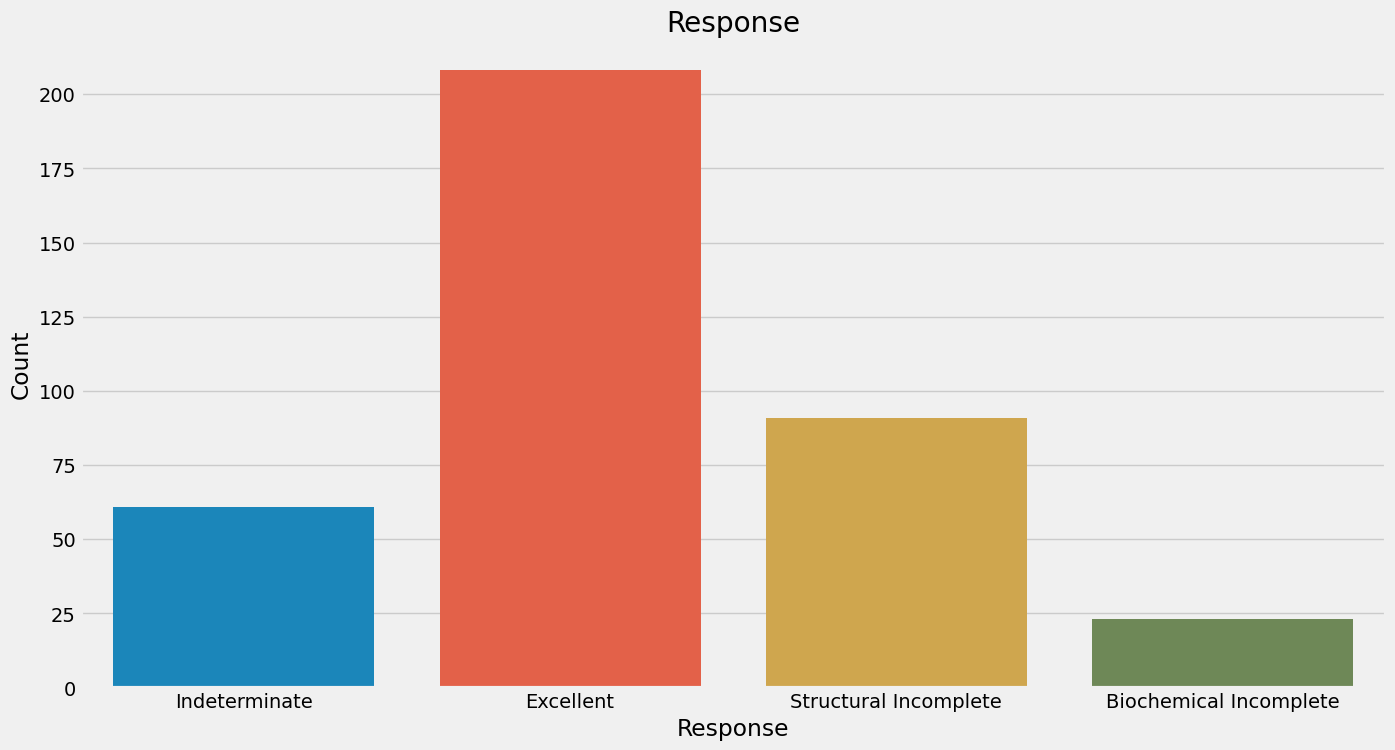

In [22]:
#Response
plt.figure(figsize = (15, 8))
sns.countplot(x = 'Response', data = df)
plt.title('Response')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

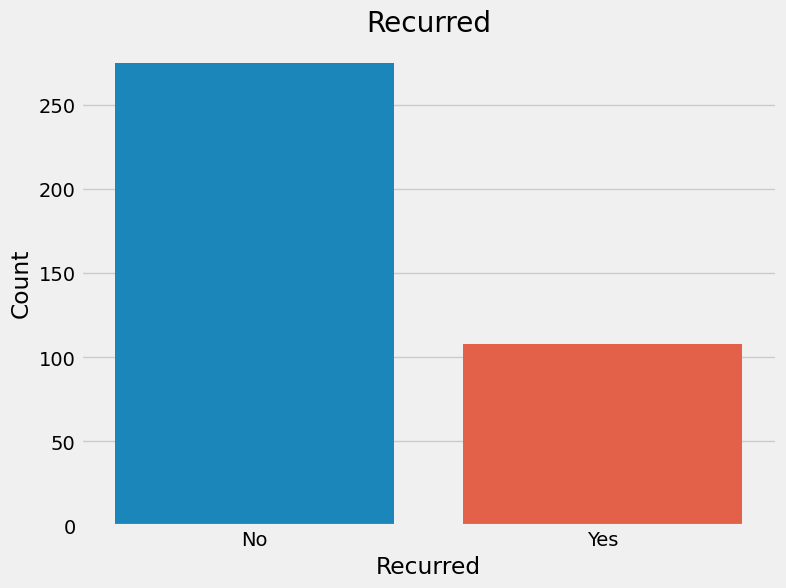

In [23]:
#Recurred
plt.figure(figsize = (8, 6))
sns.countplot(x = 'Recurred', data = df)
plt.title('Recurred')
plt.xlabel('Recurred')
plt.ylabel('Count')
plt.show()

# Data Pre-Processing

In [24]:
#define encoding methods for each column
encoding_methods = {
    'Gender': 'label',
    'Smoking': 'label',
    'Hx Smoking': 'label',
    'Hx Radiothreapy': 'label',
    'Thyroid Function': 'one-hot',
    'Physical Examination': 'one-hot',
    'Adenopathy': 'one-hot',
    'Pathology': 'one-hot',
    'Focality': 'label',
    'Risk': 'label',
    'T': 'label',
    'N': 'label',
    'M': 'label',
    'Stage': 'label',
    'Response': 'one-hot',
    'Recurred': 'label'
}

#apply encoding to each column
for column, method in encoding_methods.items():
    if method == 'label':
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
    elif method == 'one-hot':
        one_hot_encoder = OneHotEncoder(sparse = False, drop = 'first')
        encoded = one_hot_encoder.fit_transform(df[[column]])
        column_names = [f'{column}_{category}' for category in one_hot_encoder.categories_[0][1:]]
        df_encoded = pd.DataFrame(encoded, columns=column_names)
        df = pd.concat([df, df_encoded], axis = 1)
        df.drop(columns = [column], inplace = True)

In [25]:
#apply Box-Cox transformation to 'Age' column
age_boxcox, _ = stats.boxcox(df['Age'])

#apply Min-Max scaling to the transformed 'Age' column
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(age_boxcox.reshape(-1, 1)).flatten()

#replace 'Age' column with the scaled values
df['Age'] = age_scaled

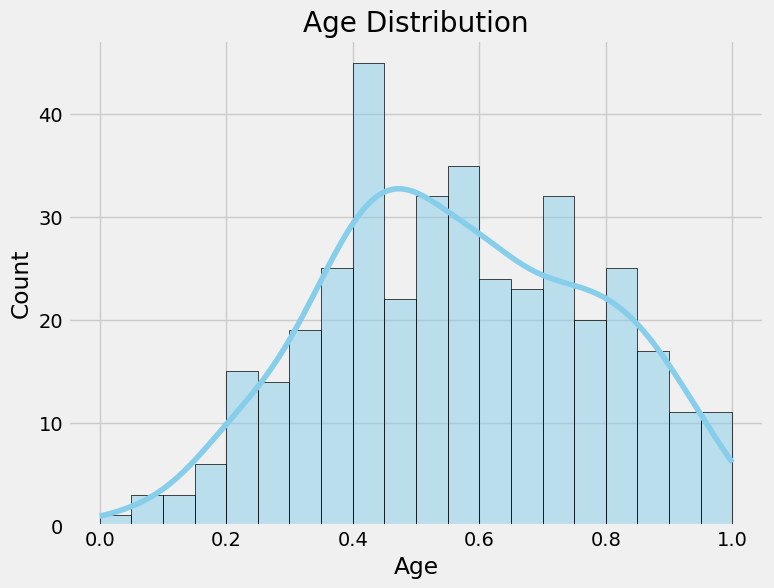

In [26]:
#Age distribution after normalizing and scaling
plt.figure(figsize = (8, 6))
sns.histplot(df['Age'], bins = 20, kde = True, color = 'skyblue', edgecolor = 'black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Modelling

In [27]:
#split data into features and target
X = df.drop(columns=['Recurred'])
y = df['Recurred']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#instantiate classification models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Gaussian Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

#fit models and generate classification reports
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred)
    print(f'{name} Classification Report:\n{report}\n')

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.86      1.00      0.93        19

    accuracy                           0.96        77
   macro avg       0.93      0.97      0.95        77
weighted avg       0.97      0.96      0.96        77


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        58
           1       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        58
           1       1.00      0.79      0.88        19

    accuracy                           0.95        77
   macro 